# **Task 2 - Fraud Detection Pipeline**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import logging

In [2]:
# Add the 'scripts' directory to the Python path for module imports
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))
sys.path.append(scripts_path)
print("✅ 'scripts' directory added to the Python path successfully!")

✅ 'scripts' directory added to the Python path successfully!


In [3]:
# Set max rows and columns to display for better visibility in outputs
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Log the configuration of display options
logging.info("📏 Maximum rows and columns set for better visibility in outputs.")
print("=======================================")
print("✅ Display options configured successfully!")

✅ Display options configured successfully!


In [4]:
# Configure logging
from logger import LoggerSetup  

# Initialize the logger for tracking the fraud detection pipeline
log_file_path = '../logs/fraud_detection_pipeline.log'
logger = LoggerSetup(log_file=log_file_path).get_logger()
print("============================================================================")
print("🔧 Logging system initialized for fraud detection pipeline.")

2025-02-17 10:54:44,982 - logger - INFO - Logger configured successfully.
INFO:logger:Logger configured successfully.


🔧 Logging system initialized for fraud detection pipeline.


In [5]:
# Import the DatasetLoader class for loading and preprocessing datasets
from data_loader import DatasetLoader 

In [6]:
# Create instances
print("📥 Loading the Fraud Dataset...")
load_fraud = DatasetLoader('../data/processed_fraud_data.csv', logger=logger)
print("✅ Fraud Dataset loaded successfully!")

print("📥 Loading the Credit Card Dataset...")
load_credit = DatasetLoader('../data/creditcard.csv', logger=logger)
print("✅ Credit Card Dataset loaded successfully!")

📥 Loading the Fraud Dataset...
✅ Fraud Dataset loaded successfully!
📥 Loading the Credit Card Dataset...
✅ Credit Card Dataset loaded successfully!


In [7]:
# Load the datasets
print("📂 Loading the Fraud Dataset...")
fraud_data = load_fraud.load_dataset().set_index('user_id')
print("✅ Fraud Dataset loaded and indexed by 'user_id'!")

print("📂 Loading the Credit Card Dataset...")
credit_data = load_credit.load_dataset()
print("✅ Credit Card Dataset loaded successfully!")

📂 Loading the Fraud Dataset...


2025-02-17 10:54:52,583 - logger - INFO - Dataset loaded successfully.
INFO:logger:Dataset loaded successfully.


✅ Fraud Dataset loaded and indexed by 'user_id'!
📂 Loading the Credit Card Dataset...


2025-02-17 10:54:54,296 - logger - INFO - Dataset loaded successfully.
INFO:logger:Dataset loaded successfully.


✅ Credit Card Dataset loaded successfully!


In [8]:
print("         📊 Overview of Credit Data (First 10 Rows):")
print("=====================================================================")
credit_data.head(10)

         📊 Overview of Credit Data (First 10 Rows):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [9]:
print("         📊 Overview of Fraud Data (First 10 Rows)")
print("=====================================================================")
fraud_data.head(10)

         📊 Overview of Fraud Data (First 10 Rows)


,purchase_value,age,class,fraud_rate,hour_of_day,day_of_week,purchase_delay,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
user_id,,,,,,,,,,,,,,,,,
247547,0.549607,-0.363124,0,-0.233869,-1.231124,1.487911,-0.413800,0.0,-0.259874,-0.232945,0.0,1.0,0.0,0.0,0.0,1.0,0.0
220737,-1.197335,0.101168,0,-1.259767,1.229002,-0.505034,-1.180852,0.0,-0.259874,-0.232943,0.0,1.0,0.0,0.0,0.0,0.0,0.0
390400,0.385831,-0.479197,0,-0.354204,1.663142,0.989675,-0.936126,0.0,0.116936,-0.232944,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69592,0.986342,-0.363124,0,-0.354204,0.650149,0.989675,0.867086,0.0,-0.259874,-0.232946,1.0,0.0,0.0,0.0,0.0,0.0,0.0
174987,0.767974,0.449387,0,-1.259767,-1.086411,-1.003270,1.700633,0.0,-0.259874,-0.232946,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23204,-0.651416,1.145825,0,-0.354204,-1.086411,1.487911,-0.269035,0.0,-0.259874,-0.232945,0.0,0.0,0.0,1.0,0.0,0.0,0.0
155230,0.003687,1.494044,0,-1.259767,0.216009,-0.006798,0.281576,0.0,-0.259874,-0.232945,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199369,0.331239,0.449387,0,0.121794,0.939575,1.487911,0.003344,0.0,0.116936,-0.232945,1.0,0.0,0.0,1.0,0.0,0.0,1.0
236894,-0.815192,-0.247051,0,0.121794,-1.520551,0.989675,-0.500649,0.0,-0.259874,-0.232945,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Understand the shapes
print("🔍 Understanding the Shapes of the Datasets:")
print(f"📊 Credit Data Shape: {credit_data.shape}")
print(f"📊 Fraud Data Shape: {fraud_data.shape}")

🔍 Understanding the Shapes of the Datasets:
📊 Credit Data Shape: (284807, 31)
📊 Fraud Data Shape: (129146, 17)


In [11]:
# Check for any missing values
print("🔍 Checking for Missing Values in Datasets:\n")
print("📊 Credit Data Missing Values:")
print(credit_data.isnull().sum())

print("📊 Fraud Data Missing Values:")
print(fraud_data.isnull().sum())

🔍 Checking for Missing Values in Datasets:

📊 Credit Data Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
📊 Fraud Data Missing Values:
purchase_value                  0
age                             0
class                           0
fraud_rate                      0
hour_of_day                     0
day_of_week                     0
purchase_delay                  0
user_transaction_frequency      0
device_transaction_frequency    0
user_transaction_velocity       0
source_Direct                   0
source_SEO                      0
browser_FireFox                 0
browser_IE                      0
browser_Opera                   0
br

### **Data Preparation**

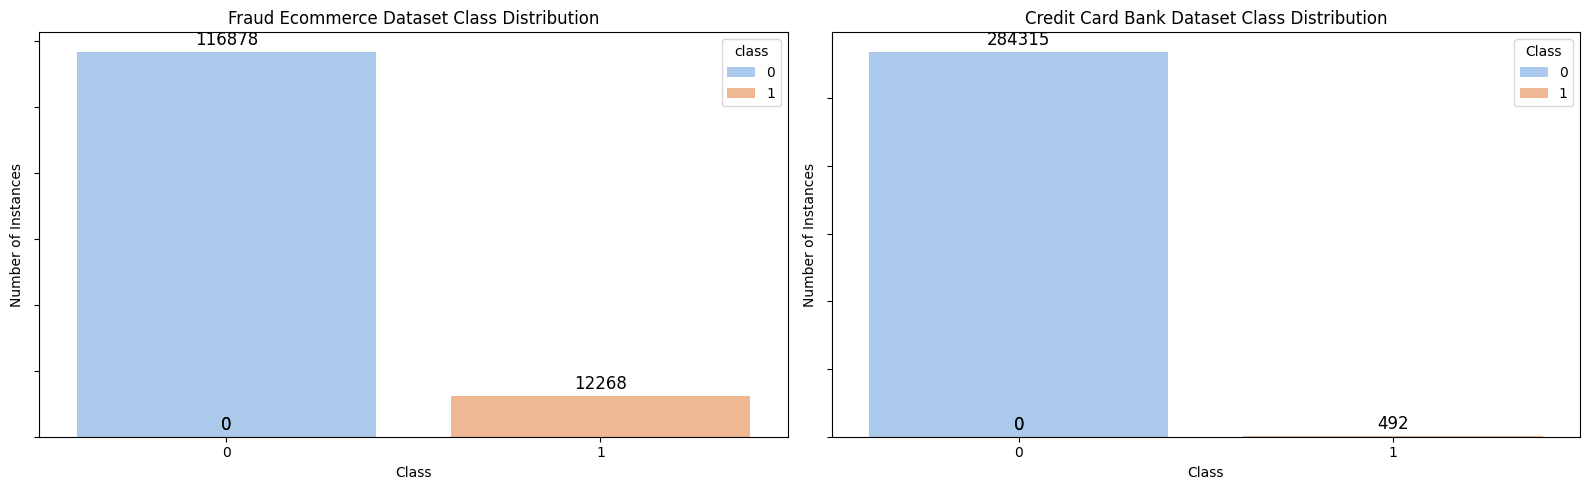

In [12]:
from fraud_detection_pipeline import visualize_class_distributions

# Load datasets
fraud_data = pd.read_csv("../data/processed_fraud_data.csv")
credit_data = pd.read_csv("../data/creditcard.csv")

# Visualize class distributions
visualize_class_distributions(fraud_data, credit_data)

### **Class Imbalance Summary**

**Fraud Ecommerce Dataset**
- **Class 0 (non-fraudulent)**: 116,878 instances
- **Class 1 (fraudulent)**: 12,268 instances
- **Imbalance**: Significant, with Class 1 underrepresented.

**Credit Card Bank Dataset**
- **Class 0**: 284,315 instances
- **Class 1**: 492 instances
- **Imbalance**: Extreme, posing serious challenges.

### **Implications**
- **Biased Models**: Models may favor the majority class, resulting in poor detection of fraud.
- **Underfitting/Overfitting**: Risk of models failing to generalize across classes.
- **Evaluation Challenges**: Traditional metrics like accuracy can be misleading.

### **Addressing Class Imbalance**
- **Oversampling**: Increase minority class instances (e.g., SMOTE).

In [13]:
from imblearn.over_sampling import SMOTE

# Function to apply SMOTE
def apply_smote(X_train, y_train):

    # Apply SMOTE to the training set
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

**For creditcard dataset** (target column 'Class'):

+ Separate Features and Target
+ apply smote(class balancing technique)
+ Split into train and test sets

In [14]:
from data_preparation import DataPreparation

# Assuming df_creditcard is the DataFrame for the credit card dataset
print("🔄 Initializing Data Preparation...")
_creditcard = DataPreparation(credit_data, target_column='Class')

print("📊 Splitting the dataset into training and testing sets...")
_creditcard.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_cc, X_test_cc, y_train_cc, y_test_cc = _creditcard.get_train_test_data()

# Displaying the shapes of the resulting datasets
print("\n📋 Training and Testing Data Summary:")
print(f"🟢 Training Features Shape: {X_train_cc.shape}")
print(f"🔴 Testing Features Shape: {X_test_cc.shape}")
print(f"🟢 Training Target Shape: {y_train_cc.shape}")
print(f"🔴 Testing Target Shape: {y_test_cc.shape}")

# apply class balancing technique(SMOTE)

# For Credit Card Bank Dataset
X_credit_resampled, y_credit_resampled = apply_smote(X_train_cc, y_train_cc)

print("\nCredit Card Bank Dataset Class Distribution After SMOTE:")
print(pd.Series(y_credit_resampled).value_counts())

print("\n✅ Data preparation is complete! Ready for model training.")

🔄 Initializing Data Preparation...
📊 Splitting the dataset into training and testing sets...
Data split into training and testing sets successfully.

📋 Training and Testing Data Summary:
🟢 Training Features Shape: (227845, 30)
🔴 Testing Features Shape: (56962, 30)
🟢 Training Target Shape: (227845,)
🔴 Testing Target Shape: (56962,)

Credit Card Bank Dataset Class Distribution After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64

✅ Data preparation is complete! Ready for model training.


**For Fraud_Data dataset** (target column 'class'):

+ Separate Features and Target
+ Split into train and test sets
+ Apply class balancing technique(SMOTE)

In [15]:
print("🔄 Initializing Data Preparation for Fraud Dataset...")
_fraud = DataPreparation(fraud_data, target_column="class")

print("📊 Splitting the Fraud Dataset into Training and Testing Sets...")
_fraud.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = _fraud.get_train_test_data()

# Displaying the shapes of the resulting datasets
print("\n📋 Fraud Dataset Train and Test Data Summary:")
print(f"🟢 Training Features Shape: {X_train_fd.shape}")
print(f"🔴 Testing Features Shape: {X_test_fd.shape}")
print(f"🟢 Training Target Shape: {y_train_fd.shape}")
print(f"🔴 Testing Target Shape: {y_test_fd.shape}")

# Apply class balancing technique(SMOTE)
X_fraud_resampled, y_fraud_resampled = apply_smote(X_train_fd, y_train_fd)
# Check the class distribution after SMOTE
print("Fraud Ecommerce Dataset Class Distribution After SMOTE:")
print(pd.Series(y_fraud_resampled).value_counts())

print("✅ Data preparation for Fraud Dataset is complete! Ready for model training.")

🔄 Initializing Data Preparation for Fraud Dataset...
📊 Splitting the Fraud Dataset into Training and Testing Sets...
Data split into training and testing sets successfully.

📋 Fraud Dataset Train and Test Data Summary:
🟢 Training Features Shape: (103316, 17)
🔴 Testing Features Shape: (25830, 17)
🟢 Training Target Shape: (103316,)
🔴 Testing Target Shape: (25830,)
Fraud Ecommerce Dataset Class Distribution After SMOTE:
class
0    93456
1    93456
Name: count, dtype: int64
✅ Data preparation for Fraud Dataset is complete! Ready for model training.


### Model Selection
- Import ModelPipeline class from model_pipeline
- Train multiple models
- hyperparameter tune
- evaluate the model
- compare the model

In [16]:
import os

# Disable GPU usage
print("🚫 Disabling GPU for this session...")
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' 

# Import the Fraud Detection Pipeline class
print("📦 Importing the Fraud Detection Pipeline...")
from fraud_detection_pipeline import FraudDetectionPipeline
print("✅ Fraud Detection Pipeline imported successfully!")

🚫 Disabling GPU for this session...
📦 Importing the Fraud Detection Pipeline...
✅ Fraud Detection Pipeline imported successfully!


### **Training and Evaluation of Models on the E-commerce Fraud Dataset**

In [17]:
# Create an instance of the fraud detection pipeline
print("🔧 Creating an instance of the Fraud Detection Pipeline...")
model_pipeline = FraudDetectionPipeline(X_train_fd, X_test_fd, y_train_fd, y_test_fd)
print("✅ Instance created successfully!")

# Add models to the pipeline
# print("➕ Adding models to the pipeline...")
# model_pipeline.add_models()
# print("✅ Models added successfully!")

# Train and evaluate the models, logging with MLflow
print("📈 Training and Evaluating the Models...")
best_model, best_model_name = model_pipeline.train_and_evaluate()
print(f"🏆 Best Model: {best_model_name} selected.")

# Save the best model
print("💾 Saving the best model...")
model_pipeline.save_best_model(best_model, best_model_name, 'fraud')
print("✅ Best model saved successfully!")

🔧 Creating an instance of the Fraud Detection Pipeline...
✅ Instance created successfully!
📈 Training and Evaluating the Models...
Tuning Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Random Forest trained in 16.41 seconds


2025/02/17 11:02:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random Forest' already exists. Creating a new version of this model...
Created version '4' of model 'Random Forest'.


Random Forest logged in MLflow
Gradient Boosting trained in 56.85 seconds


2025/02/17 11:03:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient Boosting' already exists. Creating a new version of this model...
Created version '4' of model 'Gradient Boosting'.


Gradient Boosting logged in MLflow
808/808 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


2025/02/17 11:07:01 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


LSTM trained in 206.49 seconds


2025/02/17 11:07:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LSTM' already exists. Creating a new version of this model...
Created version '4' of model 'LSTM'.


LSTM logged in MLflow
808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


2025/02/17 11:07:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


CNN trained in 28.88 seconds


2025/02/17 11:07:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'CNN' already exists. Creating a new version of this model...
Created version '4' of model 'CNN'.


CNN logged in MLflow
🏆 Best Model: Random Forest selected.
💾 Saving the best model...
Best model (Random Forest) saved at ../app/random_forest_fraud_best_model.pkl
✅ Best model saved successfully!


In [19]:
best_model, best_model_name

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier(max_depth=5))]),
 'Random Forest')

In [20]:
# Get the results 
results_fraud, y_probs_fraud = model_pipeline.get_results()

In [21]:
pd.DataFrame(results_fraud).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.956911,1.000000,0.537791,0.699433,0.837199
Gradient Boosting,0.956911,1.000000,0.537791,0.699433,0.834449
LSTM,0.956911,1.000000,0.537791,0.699433,0.833206
CNN,0.955904,0.971047,0.543189,0.696671,0.774738


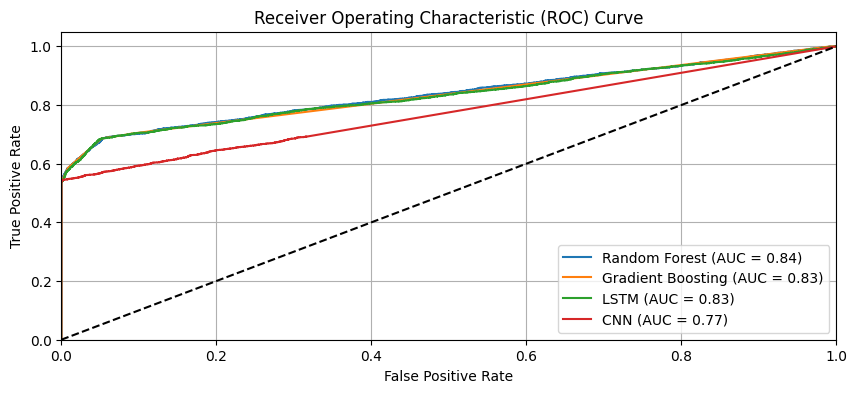

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(y_true, y_probs_dict):
    """
    Plots ROC curves for multiple models based on predicted probabilities.
    
    Parameters:
    - y_true: array-like, shape (n_samples,) - True binary labels (0 for non-fraud, 1 for fraud).
    - y_probs_dict: dict - Dictionary with model names as keys and predicted probabilities as values.
    
    Returns:
    - None
    """
    plt.figure(figsize=(10, 4))

    # Loop through each model's predicted probabilities
    for model_name, probs in y_probs_dict.items():
        fpr, tpr, _ = roc_curve(y_true, probs)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve for each model
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot roc auc of fraud:
plot_roc_curves(y_test_fd, y_probs_fraud)

### **Training and Evaluation of Models on the Creditcard Dataset**

In [23]:
# Create an instance of the fraud detection pipeline
print("🔧 Creating an instance of the Creditcard Detection Pipeline...")
model_pipeline = FraudDetectionPipeline(X_credit_resampled, X_test_cc, y_credit_resampled, y_test_cc)
print("✅ Instance created successfully!")

# Add models to the pipeline
print("➕ Adding models to the pipeline...")
model_pipeline.add_models()
print("✅ Models added successfully!")

# Train and evaluate the models, logging with MLflow
print("📈 Training and Evaluating the Models...")
best_model, best_model_name = model_pipeline.train_and_evaluate()
print(f"🏆 Best Model: {best_model_name} selected.")

# Save the best model
print("💾 Saving the best model...")
model_pipeline.save_best_model(best_model, best_model_name, 'creditcard')
print("✅ Best model saved successfully!")

🔧 Creating an instance of the Creditcard Detection Pipeline...
✅ Instance created successfully!
➕ Adding models to the pipeline...
✅ Models added successfully!
📈 Training and Evaluating the Models...
Tuning Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Random Forest trained in 603.89 seconds


2025/02/17 12:25:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random Forest' already exists. Creating a new version of this model...
Created version '5' of model 'Random Forest'.


Random Forest logged in MLflow
Gradient Boosting trained in 1150.38 seconds


2025/02/17 12:44:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient Boosting' already exists. Creating a new version of this model...
Created version '5' of model 'Gradient Boosting'.


Gradient Boosting logged in MLflow
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step


2025/02/17 12:59:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


LSTM trained in 890.79 seconds


2025/02/17 12:59:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LSTM' already exists. Creating a new version of this model...
Created version '5' of model 'LSTM'.


LSTM logged in MLflow
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


2025/02/17 13:02:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


CNN trained in 202.29 seconds


2025/02/17 13:02:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CNN logged in MLflow
🏆 Best Model: Gradient Boosting selected.
💾 Saving the best model...
Best model (Gradient Boosting) saved at ../app/gradient_boosting_creditcard_best_model.pkl
✅ Best model saved successfully!


Registered model 'CNN' already exists. Creating a new version of this model...
Created version '5' of model 'CNN'.


In [24]:
# Get the results 
results_creditcard, y_probs_credicard = model_pipeline.get_results()

In [25]:
result = pd.DataFrame(results_creditcard).T

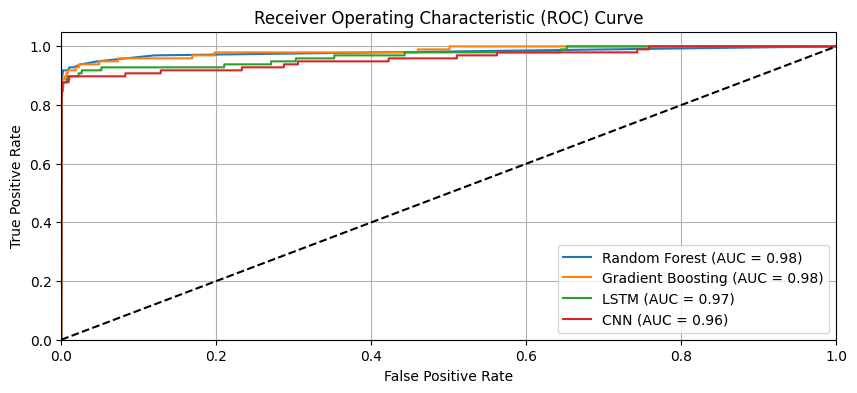

In [26]:
# Plot roc auc of fraud:
plot_roc_curves(y_test_cc, y_probs_credicard)

### **Fraud Detection Model with MLflow**

In [28]:
import mlflow
import mlflow.sklearn
import mlflow.keras

### **Random Forest with MLflow**

In [29]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  
mlflow.set_experiment("Fraud Detection Experiment")

with mlflow.start_run(run_name="FraudDetectionRun") as run:  # Capture run object
    # Log model hyperparameters
    mlflow.log_params({
        "model_type": "Random Forest",
        "n_estimators": 50,
        "max_depth": 5
    })

    # Train the model
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    rf_model = RandomForestClassifier(n_estimators=50, max_depth=5)
    rf_model.fit(X_fraud_resampled, y_fraud_resampled)

    # Make predictions
    y_pred = rf_model.predict(X_test_fd)
    y_prob = rf_model.predict_proba(X_test_fd)[:, 1]

    # Evaluate Model
    metrics = {
        "accuracy": accuracy_score(y_test_fd, y_pred),
        "precision": precision_score(y_test_fd, y_pred),
        "recall": recall_score(y_test_fd, y_pred),
        "f1_score": f1_score(y_test_fd, y_pred),
        "roc_auc": roc_auc_score(y_test_fd, y_prob),
    }

    # Log evaluation metrics
    mlflow.log_metrics(metrics)

    # Log the model
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    print(f"✅ Model training complete. Metrics logged in MLflow.")
    print(f"🏃 View run {run.info.run_id} at: http://127.0.0.1:5000/#/experiments/{run.info.experiment_id}/runs/{run.info.run_id}")

# 🛠 Use `run.info.run_id` instead of `mlflow.active_run()`
mlflow.register_model(
    f"runs:/{run.info.run_id}/random_forest_model", "Fraud_Detection_Model"
)

print("✅ Model registered successfully!")


2025/02/17 13:05:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Fraud_Detection_Model' already exists. Creating a new version of this model...
2025/02/17 13:05:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Fraud_Detection_Model, version 3


✅ Model training complete. Metrics logged in MLflow.
🏃 View run f38fb132d6cd4d1fa7fe4642e591cae0 at: http://127.0.0.1:5000/#/experiments/254910024325914828/runs/f38fb132d6cd4d1fa7fe4642e591cae0
🏃 View run FraudDetectionRun at: http://127.0.0.1:5000/#/experiments/254910024325914828/runs/f38fb132d6cd4d1fa7fe4642e591cae0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254910024325914828
✅ Model registered successfully!


Created version '3' of model 'Fraud_Detection_Model'.


### **Gradient Boosting with MLflow**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

mlflow.set_tracking_uri("http://127.0.0.1:5000")  
mlflow.set_experiment("Credit Card Experiment")

with mlflow.start_run(run_name="GradientBoostingRun") as run:
    # Log model hyperparameters
    mlflow.log_params({
        "model_type": "Gradient Boosting",
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3
    })

    # Train the model
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    gb_model.fit(X_fraud_resampled, y_fraud_resampled)

    # Make predictions
    y_pred = gb_model.predict(X_test_fd)
    y_prob = gb_model.predict_proba(X_test_fd)[:, 1]

    # Evaluate Model
    metrics = {
        "accuracy": accuracy_score(y_test_fd, y_pred),
        "precision": precision_score(y_test_fd, y_pred),
        "recall": recall_score(y_test_fd, y_pred),
        "f1_score": f1_score(y_test_fd, y_pred),
        "roc_auc": roc_auc_score(y_test_fd, y_prob),
    }

    mlflow.log_metrics(metrics)
    mlflow.sklearn.log_model(gb_model, "gradient_boosting_model")

    print(f"✅ Gradient Boosting model training complete. Metrics logged in MLflow.")
    print(f"🏃 View run at: http://127.0.0.1:5000/#/experiments/{run.info.experiment_id}/runs/{run.info.run_id}")

# Register Model
mlflow.register_model(
    f"runs:/{run.info.run_id}/gradient_boosting_model", "Fraud_Detection_GradientBoosting"
)

print("✅ Gradient Boosting Model registered successfully!")


2025/02/17 13:23:01 INFO mlflow.tracking.fluent: Experiment with name 'Credit Card Experiment' does not exist. Creating a new experiment.


2025/02/17 13:24:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Fraud_Detection_GradientBoosting' already exists. Creating a new version of this model...
2025/02/17 13:24:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Fraud_Detection_GradientBoosting, version 3


✅ Gradient Boosting model training complete. Metrics logged in MLflow.
🏃 View run at: http://127.0.0.1:5000/#/experiments/603297369034649042/runs/43ae4ff490e5443c883885e0160ed787
🏃 View run GradientBoostingRun at: http://127.0.0.1:5000/#/experiments/603297369034649042/runs/43ae4ff490e5443c883885e0160ed787
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/603297369034649042
✅ Gradient Boosting Model registered successfully!


Created version '3' of model 'Fraud_Detection_GradientBoosting'.


### **LSTM (Long Short-Term Memory) with MLflow**
LSTM (Long Short-Term Memory) is commonly used for sequential and time-series data.

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

mlflow.set_experiment("Credit Card Experiment")

with mlflow.start_run(run_name="LSTMRun") as run:
    # Define LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_fraud_resampled.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Log parameters
    mlflow.log_params({
        "model_type": "LSTM",
        "units_layer1": 50,
        "units_layer2": 50,
        "optimizer": "adam",
        "loss_function": "binary_crossentropy"
    })

    # Train model
    model.fit(X_fraud_resampled, y_fraud_resampled, epochs=10, batch_size=32, validation_data=(X_test_fd, y_test_fd))

    # Evaluate Model
    loss, accuracy = model.evaluate(X_test_fd, y_test_fd)
    mlflow.log_metrics({"loss": loss, "accuracy": accuracy})

    # Log the LSTM model
    mlflow.tensorflow.log_model(model, "lstm_model")

    print(f"✅ LSTM model training complete. Metrics logged in MLflow.")
    print(f"🏃 View run at: http://127.0.0.1:5000/#/experiments/{run.info.experiment_id}/runs/{run.info.run_id}")

# Register Model
mlflow.register_model(
    f"runs:/{run.info.run_id}/lstm_model", "Fraud_Detection_LSTM"
)

print("✅ LSTM Model registered successfully!")


Epoch 1/10


d:\KAIM\Fraud-Shield-AI\Fraud_Shield_AI\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5841/5841 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - accuracy: 0.8648 - loss: 0.3147 - val_accuracy: 0.9485 - val_loss: 0.2051
Epoch 2/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 78s 13ms/step - accuracy: 0.9439 - loss: 0.1636 - val_accuracy: 0.9483 - val_loss: 0.1890
Epoch 3/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 72s 12ms/step - accuracy: 0.9536 - loss: 0.1428 - val_accuracy: 0.9568 - val_loss: 0.1890
Epoch 4/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 67s 11ms/step - accuracy: 0.9585 - loss: 0.1307 - val_accuracy: 0.9566 - val_loss: 0.1653
Epoch 5/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - accuracy: 0.9610 - loss: 0.1253 - val_accuracy: 0.9559 - val_loss: 0.1750
Epoch 6/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.9620 - loss: 0.1224 - val_accuracy: 0.9569 - val_loss: 0.1641
Epoch 7/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 69s 12ms/step - accuracy: 0.9636 - loss: 0.1197 - val_accuracy: 0.9477 - val_loss: 0.1787
Epoch 8/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 69s 12ms/step - accuracy: 0.9641 - loss: 0.117

2025/02/17 13:38:33 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/02/17 13:38:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Fraud_Detection_LSTM' already exists. Creating a new version of this model...
2025/02/17 13:38:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Fraud_Detection_LSTM, version 3


✅ LSTM model training complete. Metrics logged in MLflow.
🏃 View run at: http://127.0.0.1:5000/#/experiments/603297369034649042/runs/b2ad224d34224d0c876e7978002bf571
🏃 View run LSTMRun at: http://127.0.0.1:5000/#/experiments/603297369034649042/runs/b2ad224d34224d0c876e7978002bf571
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/603297369034649042
✅ LSTM Model registered successfully!


Created version '3' of model 'Fraud_Detection_LSTM'.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

mlflow.set_experiment("Fraud Detection Experiment")

with mlflow.start_run(run_name="LSTMRun") as run:
    # Define LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_fraud_resampled.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Log parameters
    mlflow.log_params({
        "model_type": "LSTM",
        "units_layer1": 50,
        "units_layer2": 50,
        "optimizer": "adam",
        "loss_function": "binary_crossentropy"
    })

    # Train model
    model.fit(X_fraud_resampled, y_fraud_resampled, epochs=10, batch_size=32, validation_data=(X_test_fd, y_test_fd))

    # Evaluate Model
    loss, accuracy = model.evaluate(X_test_fd, y_test_fd)
    mlflow.log_metrics({"loss": loss, "accuracy": accuracy})

    # Log the LSTM model
    mlflow.tensorflow.log_model(model, "lstm_model")

    print(f"✅ LSTM model training complete. Metrics logged in MLflow.")
    print(f"🏃 View run at: http://127.0.0.1:5000/#/experiments/{run.info.experiment_id}/runs/{run.info.run_id}")

# Register Model
mlflow.register_model(
    f"runs:/{run.info.run_id}/lstm_model", "Fraud_Detection_LSTM"
)

print("✅ LSTM Model registered successfully!")


Epoch 1/10


d:\KAIM\Fraud-Shield-AI\Fraud_Shield_AI\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5841/5841 ━━━━━━━━━━━━━━━━━━━━ 68s 11ms/step - accuracy: 0.8653 - loss: 0.3142 - val_accuracy: 0.9399 - val_loss: 0.2271
Epoch 2/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step - accuracy: 0.9441 - loss: 0.1627 - val_accuracy: 0.9434 - val_loss: 0.1990
Epoch 3/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - accuracy: 0.9563 - loss: 0.1359 - val_accuracy: 0.9491 - val_loss: 0.1704
Epoch 4/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 73s 13ms/step - accuracy: 0.9600 - loss: 0.1267 - val_accuracy: 0.9534 - val_loss: 0.1823
Epoch 5/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 72s 11ms/step - accuracy: 0.9627 - loss: 0.1218 - val_accuracy: 0.9533 - val_loss: 0.1797
Epoch 6/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 73s 12ms/step - accuracy: 0.9632 - loss: 0.1209 - val_accuracy: 0.9568 - val_loss: 0.1653
Epoch 7/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 74s 13ms/step - accuracy: 0.9639 - loss: 0.1186 - val_accuracy: 0.9569 - val_loss: 0.1655
Epoch 8/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step - accuracy: 0.9658 - loss: 0.11

2025/02/17 13:20:44 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/02/17 13:20:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Fraud_Detection_LSTM' already exists. Creating a new version of this model...
2025/02/17 13:20:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Fraud_Detection_LSTM, version 2


✅ LSTM model training complete. Metrics logged in MLflow.
🏃 View run at: http://127.0.0.1:5000/#/experiments/254910024325914828/runs/b60659a48add41cfa82336638640dca1
🏃 View run LSTMRun at: http://127.0.0.1:5000/#/experiments/254910024325914828/runs/b60659a48add41cfa82336638640dca1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254910024325914828
✅ LSTM Model registered successfully!


Created version '2' of model 'Fraud_Detection_LSTM'.


### **CNN (Convolutional Neural Networks)**
CNN (Convolutional Neural Networks) is often used for image data but can also be adapted for structured fraud detection.

In [54]:
import mlflow
import mlflow.tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

mlflow.set_experiment("Fraud Detection Experiment")

with mlflow.start_run(run_name="CNNRun") as run:
    # Define CNN model
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_fraud_resampled.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Log parameters
    mlflow.log_params({
        "model_type": "CNN",
        "filters": 32,
        "kernel_size": 3,
        "dense_units": 50,
        "optimizer": "adam",
        "loss_function": "binary_crossentropy"
    })

    # Train model
    model.fit(X_fraud_resampled, y_fraud_resampled, epochs=10, batch_size=32, validation_data=(X_test_fd, y_test_fd))

    # Evaluate Model
    loss, accuracy = model.evaluate(X_test_fd, y_test_fd)
    mlflow.log_metrics({"loss": loss, "accuracy": accuracy})

    # Log the CNN model
    mlflow.tensorflow.log_model(model, "cnn_model")

    print(f"✅ CNN model training complete. Metrics logged in MLflow.")
    print(f"🏃 View run at: http://127.0.0.1:5000/#/experiments/{run.info.experiment_id}/runs/{run.info.run_id}")

# Register Model
mlflow.register_model(
    f"runs:/{run.info.run_id}/cnn_model", "Fraud_Detection_CNN"
)

print("✅ CNN Model registered successfully!")


Epoch 1/10


d:\KAIM\Fraud-Shield-AI\Fraud_Shield_AI\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5841/5841 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6737 - loss: 74.3617 - val_accuracy: 0.2794 - val_loss: 40.4968
Epoch 2/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8120 - loss: 16.4329 - val_accuracy: 0.9526 - val_loss: 9.0482
Epoch 3/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8283 - loss: 6.2789 - val_accuracy: 0.9535 - val_loss: 2.0391
Epoch 4/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8554 - loss: 1.5174 - val_accuracy: 0.9429 - val_loss: 0.3130
Epoch 5/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9069 - loss: 0.3383 - val_accuracy: 0.9396 - val_loss: 0.1941
Epoch 6/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9327 - loss: 0.1830 - val_accuracy: 0.9485 - val_loss: 0.1795
Epoch 7/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9440 - loss: 0.1621 - val_accuracy: 0.9535 - val_loss: 0.1763
Epoch 8/10
5841/5841 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9514 - loss: 0.1534 - 

2025/02/10 19:16:58 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/02/10 19:17:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Fraud_Detection_CNN'.
2025/02/10 19:17:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Fraud_Detection_CNN, version 1


✅ CNN model training complete. Metrics logged in MLflow.
🏃 View run at: http://127.0.0.1:5000/#/experiments/254910024325914828/runs/d8b69bd6aa814c14a02ea1c718c0fab4
🏃 View run CNNRun at: http://127.0.0.1:5000/#/experiments/254910024325914828/runs/d8b69bd6aa814c14a02ea1c718c0fab4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254910024325914828
✅ CNN Model registered successfully!


Created version '1' of model 'Fraud_Detection_CNN'.


### **Fraud Detection Model with MLflow**

📌 **Overview**

This project builds a Fraud Detection Model using Random Forest Classifier and tracks experiments with MLflow. The model is trained on resampled fraud data and evaluated on test data, with all metrics and artifacts logged to MLflow.

🚀 **Features**

+ MLflow Experiment Tracking: Logs parameters, metrics, and artifacts.

+ Random Forest Classifier: Trained with resampled fraud data.

+ Automatic Model Registration: Saves the trained model in MLflow.

+ Performance Evaluation: Logs accuracy, precision, recall, F1-score, and ROC-AUC.
  
📊 **Model Evaluation Metrics**

| Metric      | Description                                                  |
|-------------|--------------------------------------------------------------|
| Accuracy    | Measures overall correctness                                  |
| Precision   | Measures how many predicted fraud cases are actual fraud     |
| Recall      | Measures how many actual fraud cases were detected           |
| F1 Score    | Balances precision and recall                                 |
| ROC AUC     | Measures the model’s ability to distinguish between fraud and non-fraud |

📌 **Notes**

+ Ensure MLflow Tracking Server is running before executing the script.

+ The model is automatically registered in MLflow.
  
### ✅ Happy Experimenting with MLflow! 🚀